# Credit Risk Classification

Credit risk poses a classification problem that’s inherently imbalanced. This is because healthy loans easily outnumber risky loans. In this Challenge, you’ll use various techniques to train and evaluate models with imbalanced classes. You’ll use a dataset of historical lending activity from a peer-to-peer lending services company to build a model that can identify the creditworthiness of borrowers.

## Instructions:

This challenge consists of the following subsections:

* Split the Data into Training and Testing Sets

* Create a Logistic Regression Model with the Original Data

* Predict a Logistic Regression Model with Resampled Training Data 

### Split the Data into Training and Testing Sets

Open the starter code notebook and then use it to complete the following steps.

1. Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

2. Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

    > **Note** A value of `0` in the “loan_status” column means that the loan is healthy. A value of `1` means that the loan has a high risk of defaulting.  

3. Check the balance of the labels variable (`y`) by using the `value_counts` function.

4. Split the data into training and testing datasets by using `train_test_split`.

### Create a Logistic Regression Model with the Original Data

Employ your knowledge of logistic regression to complete the following steps:

1. Fit a logistic regression model by using the training data (`X_train` and `y_train`).

2. Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

3. Evaluate the model’s performance by doing the following:

    * Calculate the accuracy score of the model.

    * Generate a confusion matrix.

    * Print the classification report.

4. Answer the following question: How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

### Predict a Logistic Regression Model with Resampled Training Data

Did you notice the small number of high-risk loan labels? Perhaps, a model that uses resampled data will perform better. You’ll thus resample the training data and then reevaluate the model. Specifically, you’ll use `RandomOverSampler`.

To do so, complete the following steps:

1. Use the `RandomOverSampler` module from the imbalanced-learn library to resample the data. Be sure to confirm that the labels have an equal number of data points. 

2. Use the `LogisticRegression` classifier and the resampled data to fit the model and make predictions.

3. Evaluate the model’s performance by doing the following:

    * Calculate the accuracy score of the model.

    * Generate a confusion matrix.

    * Print the classification report.
    
4. Answer the following question: How well does the logistic regression model, fit with oversampled data, predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

### Write a Credit Risk Analysis Report

For this section, you’ll write a brief report that includes a summary and an analysis of the performance of both machine learning models that you used in this challenge. You should write this report as the `README.md` file included in your GitHub repository.

Structure your report by using the report template that `Starter_Code.zip` includes, and make sure that it contains the following:

1. An overview of the analysis: Explain the purpose of this analysis.


2. The results: Using bulleted lists, describe the balanced accuracy scores and the precision and recall scores of both machine learning models.

3. A summary: Summarize the results from the machine learning models. Compare the two versions of the dataset predictions. Include your recommendation for the model to use, if any, on the original vs. the resampled data. If you don’t recommend either model, justify your reasoning.

In [1]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

import warnings
warnings.filterwarnings('ignore')

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
lending_data_df = pd.read_csv('./Resources/lending_data.csv')

# Review the DataFrame
display(lending_data_df.head())
display(lending_data_df.tail())

print(lending_data_df.shape)
print(lending_data_df.columns)
lending_data_df.info()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
77531,19100.0,11.261,86600,0.653580,12,2,56600,1
77532,17700.0,10.662,80900,0.629172,11,2,50900,1
77533,17600.0,10.595,80300,0.626401,11,2,50300,1
77534,16300.0,10.068,75300,0.601594,10,2,45300,1
77535,15600.0,9.742,72300,0.585062,9,2,42300,1


(77536, 8)
Index(['loan_size', 'interest_rate', 'borrower_income', 'debt_to_income',
       'num_of_accounts', 'derogatory_marks', 'total_debt', 'loan_status'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77536 entries, 0 to 77535
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_size         77536 non-null  float64
 1   interest_rate     77536 non-null  float64
 2   borrower_income   77536 non-null  int64  
 3   debt_to_income    77536 non-null  float64
 4   num_of_accounts   77536 non-null  int64  
 5   derogatory_marks  77536 non-null  int64  
 6   total_debt        77536 non-null  int64  
 7   loan_status       77536 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 4.7 MB


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [3]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = lending_data_df['loan_status']

# Separate the X variable, the features
X = lending_data_df.drop(columns = 'loan_status')

In [4]:
# Review the y variable Series
y[:5]

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [5]:
# Review the X variable DataFrame
X

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000
...,...,...,...,...,...,...,...
77531,19100.0,11.261,86600,0.653580,12,2,56600
77532,17700.0,10.662,80900,0.629172,11,2,50900
77533,17600.0,10.595,80300,0.626401,11,2,50300
77534,16300.0,10.068,75300,0.601594,10,2,45300


### Step 3: Check the balance of the labels variable (`y`) by using the `value_counts` function.

loan_status
0    75036
1     2500
Name: count, dtype: int64


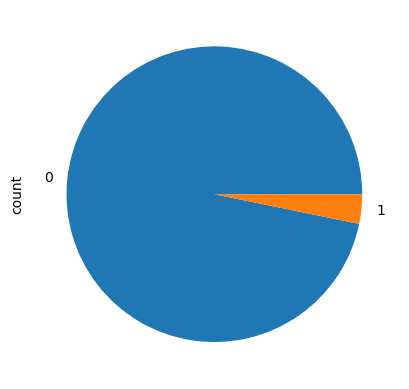

In [8]:
# Check the balance of our target values
y.value_counts().plot(kind='pie')

print(y.value_counts())

### Step 4: Split the data into training and testing datasets by using `train_test_split`.

In [10]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify = y)

---

## Create a Logistic Regression Model with the Original Data

### Step 0: Using StandardScaler to scale train data

In [26]:
# Import module
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled[:5]

array([[-0.62386683, -0.64129288, -0.63583253, -0.74514953, -0.43455877,
        -0.67485272, -0.63583253],
       [ 0.0904875 ,  0.07374341,  0.07865663,  0.2611305 ,  0.08893183,
        -0.67485272,  0.07865663],
       [-0.67149046, -0.65698333, -0.65964884, -0.78345111, -0.43455877,
        -0.67485272, -0.65964884],
       [ 0.56672373,  0.54333621,  0.54307459,  0.7948517 ,  0.61242243,
         1.04118363,  0.54307459],
       [-0.43337234, -0.41490208, -0.40957763, -0.39796827, -0.43455877,
        -0.67485272, -0.40957763]])

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [12]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
model = LogisticRegression(random_state=1)

# Fit the model using training data
model.fit(X_train_scaled,y_train)

LogisticRegression(random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [13]:
# Make a prediction using the testing data
predictions = model.predict(X_test_scaled)

# Value Count of Predictions
df = pd.DataFrame(predictions.reshape(-1,1))
df.value_counts()

0    18681
1      703
Name: count, dtype: int64

### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [15]:
# Print the balanced_accuracy score of the model
balanced_accuracy_score(y_test, predictions) 

0.9880011514473053

In [16]:
# Generate a confusion matrix for the model
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_test, predictions), index = ['Actual 0','Actual 1'],
                                   columns = ['Prediction 0','Prediction 1'])

confusion_matrix_df

,Prediction 0,Prediction 1
Actual 0,18669,90
Actual 1,12,613


In [17]:
# Print the classification report for the model
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18759
           1       0.87      0.98      0.92       625

    accuracy                           0.99     19384
   macro avg       0.94      0.99      0.96     19384
weighted avg       1.00      0.99      0.99     19384



### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** The model predicts healthy loans perfectly with precision and recall score of 1.00. However, when it comes to predicting high-risk loans, the model's performance is a touch low. One explanation for this performance could be attributed to the data samples with very high percentage of healthy loan smaples compared to the high-risk ones. 

---

## Predict a Logistic Regression Model with Resampled Training Data

### Step 1: Use the `RandomOverSampler` module from the imbalanced-learn library to resample the data. Be sure to confirm that the labels have an equal number of data points. 

In [19]:
# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
ros_model = RandomOverSampler(random_state=1)

# Fit the original training data to the random_oversampler model
X_resampled_ros, y_resampled_ros = ros_model.fit_resample(X_train_scaled, y_train)

In [20]:
# Count the distinct values of the resampled labels data
y_resampled_ros.value_counts()

loan_status
0    56277
1    56277
Name: count, dtype: int64

### Step 2: Use the `LogisticRegression` classifier and the resampled data to fit the model and make predictions.

In [21]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
model = LogisticRegression(random_state=1)

# Fit the model using the resampled training data
model.fit(X_resampled_ros, y_resampled_ros)

# Make a prediction using the testing data
ros_predictions = model.predict(X_test_scaled)

### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [22]:
# Print the balanced_accuracy score of the model 
balanced_accuracy_score(y_test, ros_predictions)

0.9958145743376512

In [23]:
# Generate a confusion matrix for the model
ros_confusion_matrix_df = pd.DataFrame(confusion_matrix(y_test, ros_predictions), index = ['Actual 0','Actual 1'],
                                   columns = ['Prediction 0','Prediction 1'])

ros_confusion_matrix_df

,Prediction 0,Prediction 1
Actual 0,18662,97
Actual 1,2,623


In [27]:
# Print the classification report for the model
print(classification_report(y_test, ros_predictions))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18759
           1       0.87      1.00      0.93       625

    accuracy                           0.99     19384
   macro avg       0.93      1.00      0.96     19384
weighted avg       1.00      0.99      1.00     19384



### Step 4: Answer the following question

**Question:** How well does the logistic regression model, fit with oversampled data, predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** With Random Over Sampling, the logistic regression model predicts with perfect accuracy. In case of  healthy loans perfectly with precision and recall score of 1.00. And in case of high-risk loans, the model's performance is a perfect 1.00 on recall with similar precision score as with the regular model.

Overall, random over sampling improved the predictability of the Logistic Regression model for the given dataset.